In [2]:
#call in csvs- GNSS-VOD Data
vod = pd.read_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-5.7/vod_anom.csv')
vod.head()

,Epoch,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,...,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
0,2025-01-14 00:00:00,C11,NaN,NaN,-71.0,14.7,5041,0.510881,0.207916,158,...,0.173889,12,-70.535640,0.458874,289,14.261938,0.528629,289,NaN,NaN
1,2025-01-14 00:00:00,C12,NaN,NaN,-18.4,41.6,2248,0.129065,0.532692,552,...,0.269416,165,-17.912109,0.600029,991,41.792432,0.585337,991,NaN,NaN
2,2025-01-14 00:00:00,C21,NaN,NaN,150.9,38.2,2508,2.241606,0.508892,129,...,0.439859,54,149.828049,0.556231,164,37.808537,0.532433,164,NaN,NaN
3,2025-01-14 00:00:00,C22,NaN,NaN,82.1,36.3,2656,1.117524,0.537357,169,...,0.573407,109,82.770466,0.544679,193,36.400518,0.454319,193,NaN,NaN
4,2025-01-14 00:00:00,C24,NaN,NaN,-115.8,48.2,1713,2.295679,0.790237,182,...,0.796935,95,-116.413750,0.688958,240,47.983750,0.467910,240,NaN,NaN


In [3]:
#date time and setting to local 
vod['Epoch'] = pd.to_datetime(vod['Epoch'])                
vod['Epoch'] = vod['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')  
vod = vod.set_index('Epoch')


In [4]:
# spatial masking
vod_moreveg = vod[
    (vod['Azimuth_mean'] >= 120) & (vod['Azimuth_mean'] <= 150) &
    (vod['Elevation_mean'] >= 20) & (vod['Elevation_mean'] <= 40)
]

vod_moreveg.head()
#
vod_lessveg = vod[
    ((vod['Azimuth_mean'] >= 30) & (vod['Azimuth_mean'] <= 40) &
     (vod['Elevation_mean'] >= 50) & (vod['Elevation_mean'] <= 60)) 
]

vod_lessveg.head()

,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,,
2025-01-13 19:33:30-05:00,E18,0.310717,NaN,30.1,57.5,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,-0.120939,NaN
2025-01-13 19:34:00-05:00,E18,0.738772,NaN,30.7,57.6,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.307116,NaN
2025-01-13 19:34:30-05:00,E18,0.136090,NaN,31.2,57.6,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,-0.295567,NaN
2025-01-13 19:35:00-05:00,E18,0.836904,NaN,31.8,57.7,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.405247,NaN
2025-01-13 19:35:30-05:00,E18,0.486572,NaN,32.4,57.7,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.054916,NaN


In [5]:
# remove NaN values

vod_moreveg = vod_moreveg.dropna(subset=['VOD1_anom'])

vod_lessveg = vod_lessveg.dropna(subset=['VOD1_anom'])

In [6]:
# get hourly data
vod_moreveg['hour'] = vod_moreveg.index.hour
vod_moreveg['month'] = vod_moreveg.index.month
vod_moreveg['day'] = vod_moreveg.index.day
vod_moreveg_hour = vod_moreveg[['VOD1_anom','VOD1','month','day','hour','CellID','Azimuth','Elevation']].groupby(['month','day','hour'], as_index=False).agg(['mean','count'])
vod_moreveg_hour.head()

month day hour VOD1_anom            VOD1             CellID        \
                      mean count      mean count         mean count   
0     1  11   13  0.313561     5  0.642297     5  4240.600000     5   
1     1  11   15  0.190184     7  0.749038     7  3868.571429     7   
2     1  11   16 -0.077127    79  0.776081    79  3254.025316    79   
3     1  11   17  0.250124    34  1.906649    34  2977.470588    34   
4     1  11   18  0.055904     3  0.173061     3  4081.666667     3   

      Azimuth        Elevation        
         mean count       mean count  
0  123.500000     5  20.620000     5  
1  137.900000     7  24.157143     7  
2  129.077215    79  30.111392    79  
3  139.111765    34  33.135294    34  
4  142.633333     3  22.133333     3

In [7]:
# remove mult-index in columns

new_columns = [col[0]+'_'+col[1] for col in vod_moreveg_hour.columns]

vod_moreveg_hour.columns = new_columns

In [8]:
# Remove hours with too few observations
obs_threshold = 30

vod_moreveg_hour_filter = vod_moreveg_hour.query(f'VOD1_anom_count > {obs_threshold}')

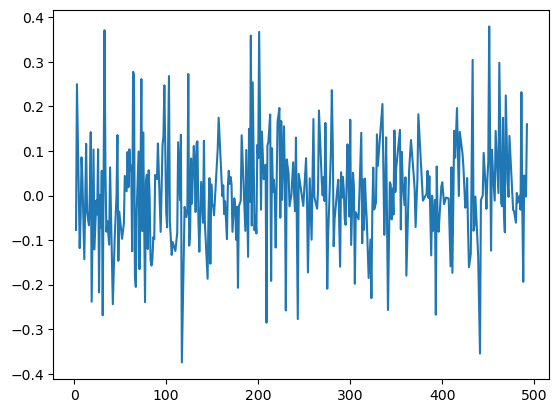

In [9]:
plt.plot(vod_moreveg_hour_filter['VOD1_anom_mean'])

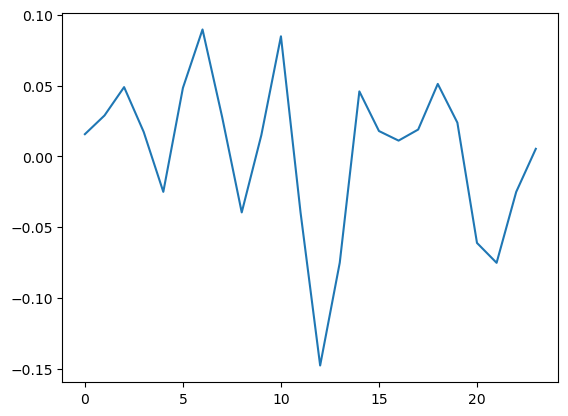

In [10]:
# get hourly data
vod_moreveg_diurnal = vod_moreveg_hour_filter.groupby(['hour_'], as_index=False).mean()
plt.plot(vod_moreveg_diurnal['VOD1_anom_mean'])

In [11]:
vod_moreveg_hour_filter.columns

Index(['month_', 'day_', 'hour_', 'VOD1_anom_mean', 'VOD1_anom_count',
       'VOD1_mean', 'VOD1_count', 'CellID_mean', 'CellID_count',
       'Azimuth_mean', 'Azimuth_count', 'Elevation_mean', 'Elevation_count'],
      dtype='object')

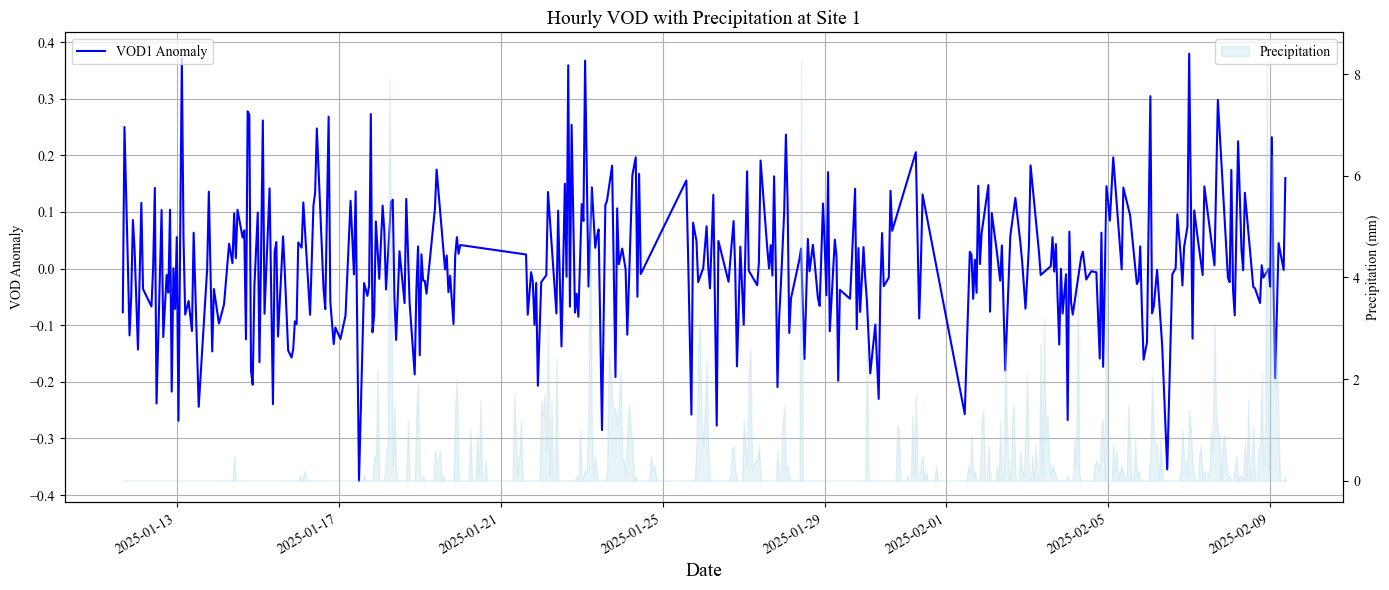

In [42]:
#made the timestamp into datetime index
vod = vod_moreveg_hour_filter.copy()
vod['Timestamp'] = pd.to_datetime({
    'year': 2025,
    'month': vod['month_'],
    'day': vod['day_'],
    'hour': vod['hour_']
})
vod.set_index('Timestamp', inplace=True)

# set the same date filterng for precip 
start = vod.index.min()
end = vod.index.max()
precip = precipitation_data.loc[start:end]
precip_hourly = precip.resample('1h').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# plottin
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(vod.index, vod['VOD1_anom_mean'], label='VOD1 Anomaly', color='blue')
ax1.set_xlabel("Date",fontsize=14)
ax1.set_ylabel("VOD Anomaly")
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3, label='Precipitation')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

ax1.set_title("Hourly VOD with Precipitation at Site 1",fontsize=14)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()



In [43]:
#call in csvs- GNSS-VOD Data
vod12 = pd.read_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.2/vod_anom12.csv')
vod12.head()

,Epoch,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,...,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
0,2023-10-06 00:00:00,C19,NaN,NaN,-46.0,7.7,5732,0.178573,0.151476,106,...,0.142980,36,-46.818905,0.470150,201,8.020398,0.633034,201,NaN,NaN
1,2023-10-06 00:00:00,C20,NaN,NaN,-86.5,37.8,2570,1.047158,0.664350,176,...,0.716403,108,-86.561993,0.578307,271,38.119188,0.624975,271,NaN,NaN
2,2023-10-06 00:00:00,C23,NaN,NaN,62.3,22.9,4034,1.014101,0.364073,146,...,NaN,0,61.976098,0.488861,205,21.851220,0.508806,205,NaN,NaN
3,2023-10-06 00:00:00,C27,NaN,NaN,169.5,34.3,2888,0.533966,0.892311,21,...,NaN,0,169.911688,0.431025,77,34.125974,0.575692,77,NaN,NaN
4,2023-10-06 00:00:00,C28,NaN,NaN,104.0,47.0,1808,2.209723,1.199658,198,...,0.738708,126,103.006161,0.675003,211,46.049289,0.566726,211,NaN,NaN


In [44]:
#date time and setting to local 
vod12['Epoch'] = pd.to_datetime(vod12['Epoch'])                
vod12['Epoch'] = vod12['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')  
vod12 = vod12.set_index('Epoch')

In [45]:
#masking
vod_moreveg12 = vod12[vod12['Elevation_mean'] <= 60]
vod_lessveg12 = vod12[vod12['Elevation_mean'] > 60]

# filtering to only 2025
vod_moreveg12 = vod_moreveg12[vod_moreveg12.index.year == 2025]
vod_lessveg12 = vod_lessveg12[vod_lessveg12.index.year == 2025]


In [46]:
# remove NaN values

vod_moreveg12 = vod_moreveg12.dropna(subset=['VOD1_anom'])

vod_lessveg12 = vod_lessveg12.dropna(subset=['VOD1_anom'])

In [47]:
# get hourly data
vod_moreveg12['hour'] = vod_moreveg12.index.hour
vod_moreveg12['month'] = vod_moreveg12.index.month
vod_moreveg12['day'] = vod_moreveg12.index.day
vod_moreveg_hour12 = vod_moreveg12[['VOD1_anom','VOD1','month','day','hour','CellID','Azimuth','Elevation']].groupby(['month','day','hour'], as_index=False).agg(['mean','count'])
vod_moreveg_hour12.head()

month day hour VOD1_anom            VOD1             CellID        \
                      mean count      mean count         mean count   
0     1  14    9 -1.027734   106  0.040994   106  2826.207547   106   
1     1  14   10 -0.034751  1897  0.965800  1897  2919.980496  1897   
2     1  14   11 -0.084154  2014  1.023578  2014  2823.479146  2014   
3     1  14   12 -0.040970  2520  0.918504  2520  2894.429365  2520   
4     1  14   13 -0.535538  2539  0.378306  2539  2928.411579  2539   

     Azimuth        Elevation        
        mean count       mean count  
0   5.486792   106  36.532075   106  
1   6.334423  1897  35.120770  1897  
2 -16.717825  2014  36.000447  2014  
3  -3.484405  2520  35.277063  2520  
4  -8.223277  2539  34.417960  2539

In [48]:
# remove mult-index in columns

new_columns = [col[0]+'_'+col[1] for col in vod_moreveg_hour12.columns]

vod_moreveg_hour12.columns = new_columns

In [49]:
# Remove hours with too few observations
obs_threshold = 30

vod_moreveg_hour_filter12 = vod_moreveg_hour12.query(f'VOD1_anom_count > {obs_threshold}')

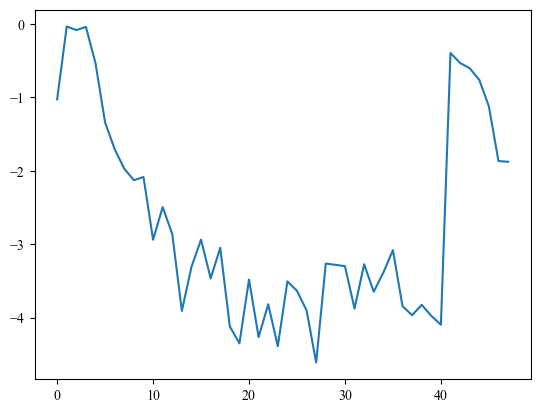

In [50]:
plt.plot(vod_moreveg_hour_filter12['VOD1_anom_mean'])

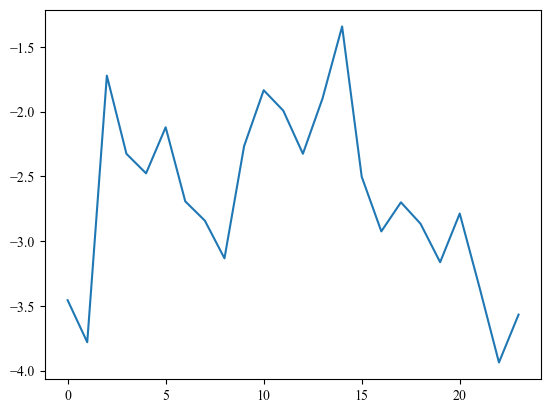

In [51]:
# get hourly data
vod_moreveg_diurnal12 = vod_moreveg_hour_filter12.groupby(['hour_'], as_index=False).mean()
plt.plot(vod_moreveg_diurnal12['VOD1_anom_mean'])

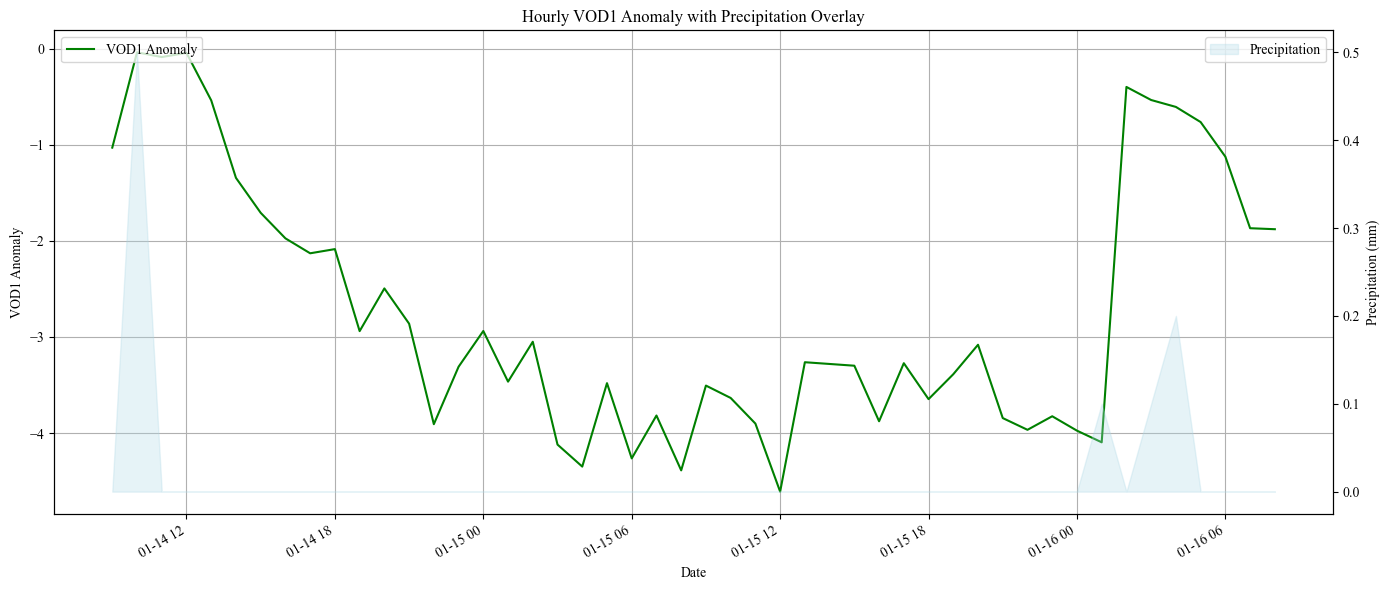

In [52]:
#made the timestamp into datetime index
vod = vod_moreveg_hour_filter12.copy()
vod['Timestamp'] = pd.to_datetime({
    'year': 2025,
    'month': vod['month_'],
    'day': vod['day_'],
    'hour': vod['hour_']
})
vod.set_index('Timestamp', inplace=True)

# set the same date filterng for precip 
start = vod.index.min()
end = vod.index.max()
precip = precipitation_data.loc[start:end]
precip_hourly = precip.resample('1h').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# plottin
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(vod.index, vod['VOD1_anom_mean'], label='VOD1 Anomaly', color='green')
ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1 Anomaly")
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3, label='Precipitation')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

ax1.set_title("Hourly VOD1 Anomaly with Precipitation Overlay")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [53]:
#call in csvs- GNSS-VOD Data
vod17 = pd.read_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_anom17.csv')
vod17.head()

,Epoch,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,...,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
0,2023-10-06 00:00:00,C19,NaN,NaN,-46.0,7.7,5732,0.178573,0.151476,106,...,0.142980,36,-46.818905,0.470150,201,8.020398,0.633034,201,NaN,NaN
1,2023-10-06 00:00:00,C20,NaN,NaN,-86.5,37.8,2570,1.047158,0.664350,176,...,0.716403,108,-86.561993,0.578307,271,38.119188,0.624975,271,NaN,NaN
2,2023-10-06 00:00:00,C23,NaN,NaN,62.3,22.9,4034,1.014101,0.364073,146,...,NaN,0,61.976098,0.488861,205,21.851220,0.508806,205,NaN,NaN
3,2023-10-06 00:00:00,C27,NaN,NaN,169.5,34.3,2888,0.533966,0.892311,21,...,NaN,0,169.911688,0.431025,77,34.125974,0.575692,77,NaN,NaN
4,2023-10-06 00:00:00,C28,NaN,NaN,104.0,47.0,1808,2.209723,1.199658,198,...,0.738708,126,103.006161,0.675003,211,46.049289,0.566726,211,NaN,NaN


In [54]:

vod17['Epoch'] = pd.to_datetime(vod17['Epoch'])
vod17['Epoch'] = vod17['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')
vod17 = vod17.set_index('Epoch')


In [55]:
vod17_2025 = vod17[vod17.index.year == 2025]
vod17=vod17_2025
vod17.head()


,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,,
2025-01-14 09:54:00-05:00,R02,-1.951739,NaN,178.6,62.0,768,0.871047,0.941552,225,1.207589,0.734029,180,177.933778,0.710141,225,62.007556,0.573901,225,-2.822786,NaN
2025-01-14 09:54:00-05:00,R03,-1.405928,NaN,-41.3,54.5,1306,0.918901,0.783082,223,1.129071,0.727708,128,-41.153220,0.788899,295,54.147458,0.547833,295,-2.324829,NaN
2025-01-14 09:54:30-05:00,R02,-1.419162,NaN,178.7,61.7,768,0.871047,0.941552,225,1.207589,0.734029,180,177.933778,0.710141,225,62.007556,0.573901,225,-2.290208,NaN
2025-01-14 09:54:30-05:00,R03,-1.052367,NaN,-41.6,54.7,1306,0.918901,0.783082,223,1.129071,0.727708,128,-41.153220,0.788899,295,54.147458,0.547833,295,-1.971268,NaN
2025-01-14 09:55:00-05:00,E04,-0.000000,NaN,-29.2,48.1,1750,1.334476,1.425821,342,1.445602,1.204241,263,-29.376355,0.664130,406,48.058621,0.537908,406,-1.334476,NaN


In [56]:
# More vegetation mask
moreveg_mask = (
    (vod17['Elevation_mean'] > 20) &
    (
        ((vod17['Azimuth_mean'] >= 310) & (vod17['Azimuth_mean'] <= 315)) |
        ((vod17['Azimuth_mean'] >= 60) & (vod17['Azimuth_mean'] <= 110))
    )
)

# Apply mask
vod_moreveg17 = vod17[moreveg_mask]
vod_lessveg17 = vod17[~moreveg_mask]


In [57]:
# remove NaN values

vod_moreveg17 = vod_moreveg17.dropna(subset=['VOD1_anom'])

vod_lessveg17 = vod_lessveg17.dropna(subset=['VOD1_anom'])

In [58]:
# get hourly data
vod_moreveg17['hour'] = vod_moreveg17.index.hour
vod_moreveg17['month'] = vod_moreveg17.index.month
vod_moreveg17['day'] = vod_moreveg17.index.day
vod_moreveg_hour17 = vod_moreveg17[['VOD1_anom','VOD1','month','day','hour','CellID','Azimuth','Elevation']].groupby(['month','day','hour'], as_index=False).agg(['mean','count'])
vod_moreveg_hour17.head()

month day hour VOD1_anom            VOD1             CellID        \
                      mean count      mean count         mean count   
0     1  14   10  0.171502   156  1.577185   156  2613.782051   156   
1     1  14   11  0.010469   317  1.407177   317  1867.126183   317   
2     1  14   12  0.169245   142  1.911065   142  2026.225352   142   
3     1  14   13 -0.463066   202  0.996549   202  1799.054455   202   
4     1  14   14 -1.685682   268 -0.207191   268  1732.563433   268   

     Azimuth        Elevation        
        mean count       mean count  
0  67.563462   156  37.666667   156  
1  86.718612   317  48.591798   317  
2  88.428873   142  43.823944   142  
3  83.437624   202  48.254950   202  
4  90.748507   268  49.165672   268

In [59]:
# remove mult-index in columns

new_columns = [col[0]+'_'+col[1] for col in vod_moreveg_hour17.columns]

vod_moreveg_hour17.columns = new_columns

In [60]:
# Remove hours with too few observations
obs_threshold = 30

vod_moreveg_hour_filter17 = vod_moreveg_hour17.query(f'VOD1_anom_count > {obs_threshold}')

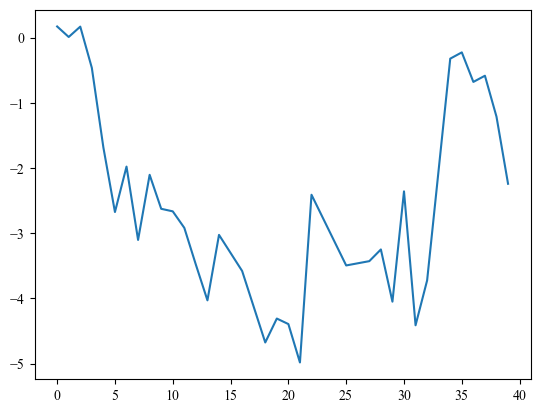

In [61]:
plt.plot(vod_moreveg_hour_filter17['VOD1_anom_mean'])

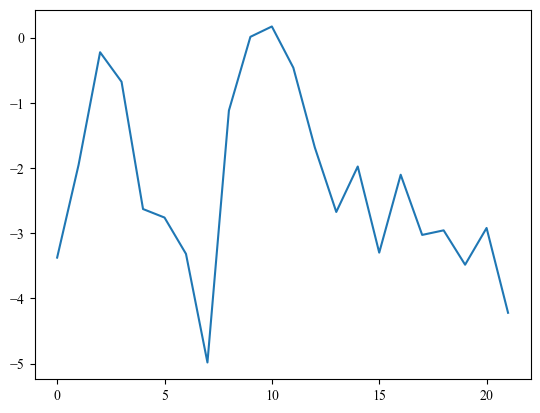

In [62]:
# get hourly data
vod_moreveg_diurnal17 = vod_moreveg_hour_filter17.groupby(['hour_'], as_index=False).mean()
plt.plot(vod_moreveg_diurnal17['VOD1_anom_mean'])

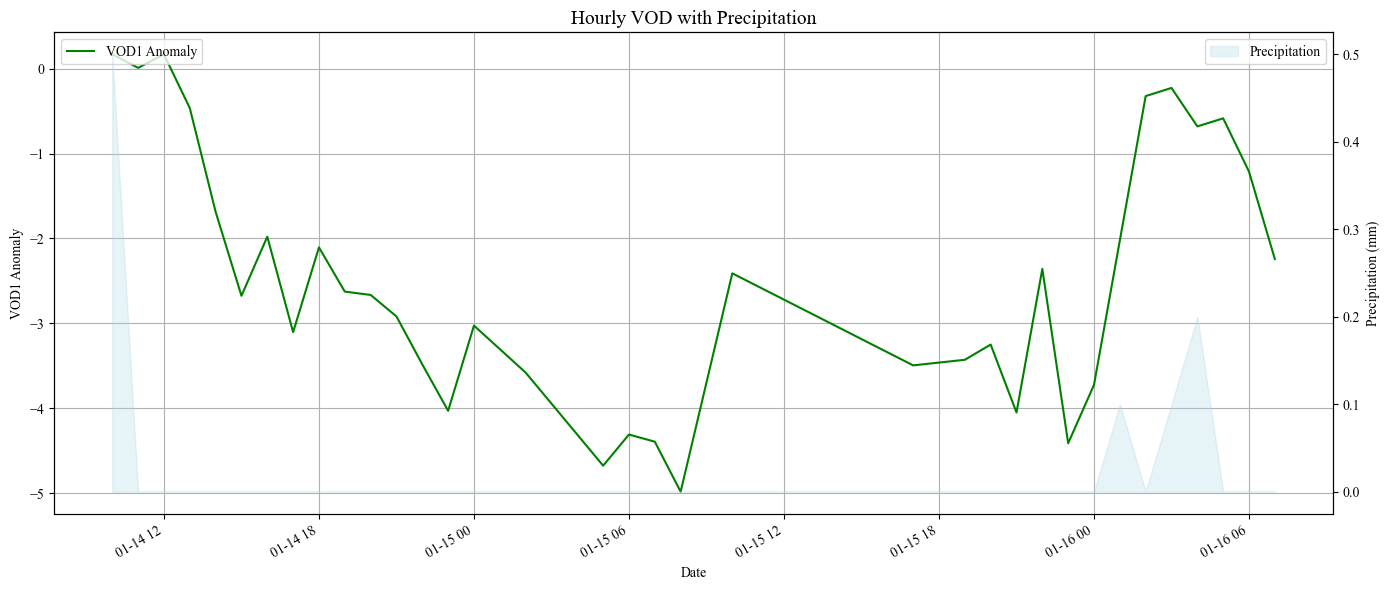

In [63]:
#made the timestamp into datetime index

vod = vod_moreveg_hour_filter17.copy()
vod['Timestamp'] = pd.to_datetime({
    'year': 2025,
    'month': vod['month_'],
    'day': vod['day_'],
    'hour': vod['hour_']
})
vod.set_index('Timestamp', inplace=True)

# set the same date filterng for precip 
start = vod.index.min()
end = vod.index.max()
precip = precipitation_data.loc[start:end]
precip_hourly = precip.resample('1h').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# plottin
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(vod.index, vod['VOD1_anom_mean'], label='VOD1 Anomaly', color='green')
ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1 Anomaly")
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3, label='Precipitation')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

ax1.set_title("Hourly VOD with Precipitation",fontsize=14)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

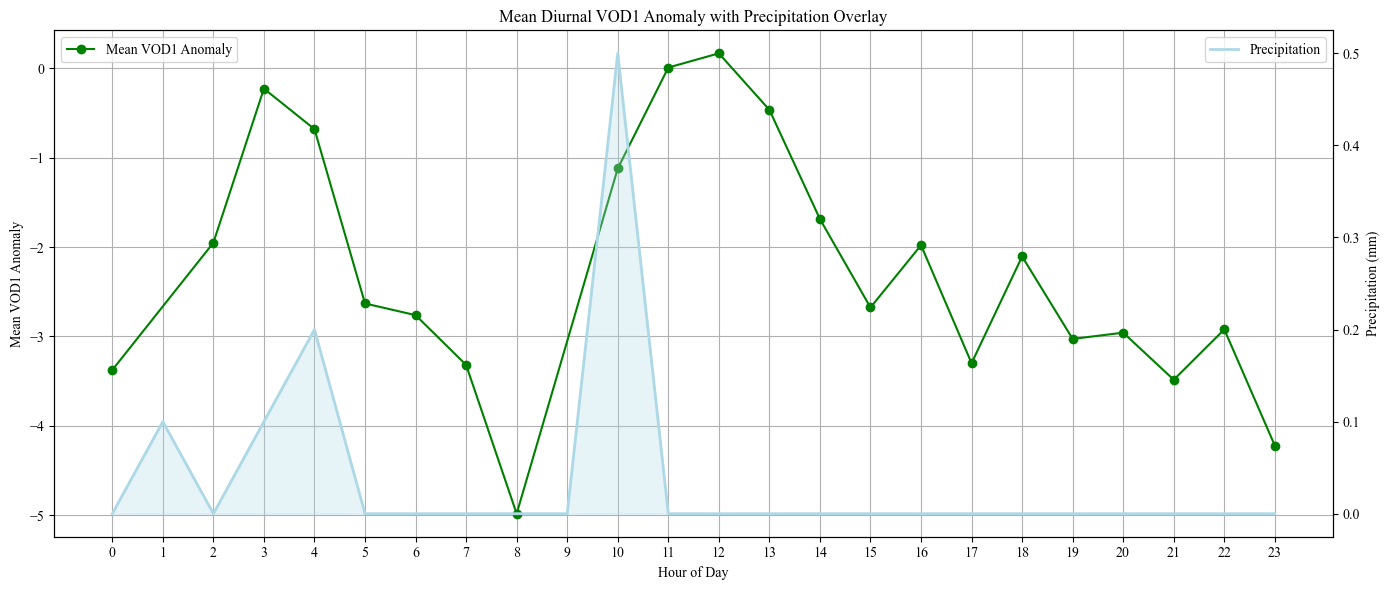

In [64]:
# Prep: build timestamp index (you already have this part right)
vod = vod_moreveg_hour_filter17.copy()
vod['Timestamp'] = pd.to_datetime({
    'year': 2025,
    'month': vod['month_'],
    'day': vod['day_'],
    'hour': vod['hour_']
})
vod.set_index('Timestamp', inplace=True)

# Add hour of day
vod['hour'] = vod.index.hour

# Diurnal VOD1 anomaly mean (by hour)
vod_diurnal = vod.groupby('hour')['VOD1_anom_mean'].mean().reset_index()

# Match precip to VOD time range and group by hour
start = vod.index.min()
end = vod.index.max()
precip = precipitation_data.loc[start:end].copy()
precip['hour'] = precip.index.hour
precip_diurnal = precip.groupby('hour').sum(numeric_only=True)
precip_col = precip_diurnal.columns[0]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# VOD1 anomaly (diurnal mean)
ax1.plot(vod_diurnal['hour'], vod_diurnal['VOD1_anom_mean'],
         label='Mean VOD1 Anomaly', color='green', marker='o')
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Mean VOD1 Anomaly")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')
ax1.set_title("Mean Diurnal VOD1 Anomaly with Precipitation Overlay")

# Precip on secondary axis
ax2 = ax1.twinx()
ax2.plot(precip_diurnal.index, precip_diurnal[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_diurnal.index, precip_diurnal[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


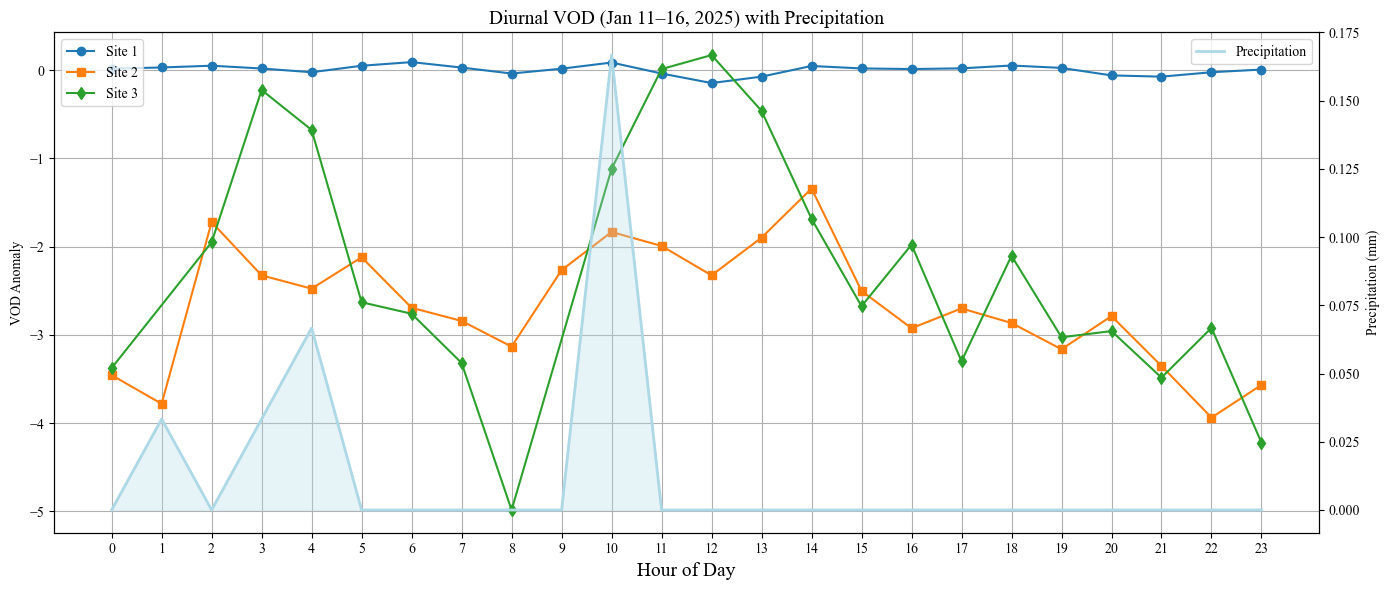

In [69]:

plt.rcParams["font.family"] = "Times New Roman"

# Process precipitation (diurnal)
start = pd.Timestamp("2025-01-14")
end = pd.Timestamp("2025-01-16 23:59:59")
precip = precipitation_data.loc[start:end].copy()
precip['hour'] = precip.index.hour
precip_diurnal = precip.groupby('hour').mean(numeric_only=True)
precip_col = precip_diurnal.columns[0]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot VOD1 anomaly (diurnal)
ax1.plot(vod_moreveg_diurnal['hour_'], vod_moreveg_diurnal['VOD1_anom_mean'], label='Site 1', marker='o')
ax1.plot(vod_moreveg_diurnal12['hour_'], vod_moreveg_diurnal12['VOD1_anom_mean'], label='Site 2', marker='s')
ax1.plot(vod_moreveg_diurnal17['hour_'], vod_moreveg_diurnal17['VOD1_anom_mean'], label='Site 3', marker='d')

ax1.set_xlabel("Hour of Day",fontsize=14)
ax1.set_ylabel("VOD Anomaly")
ax1.set_xticks(range(24))
ax1.grid(True)
ax1.legend(loc='upper left')
ax1.set_title("Diurnal VOD (Jan 11–16, 2025) with Precipitation",fontsize=14)

# Precip overlay
ax2 = ax1.twinx()
ax2.plot(precip_diurnal.index, precip_diurnal[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_diurnal.index, precip_diurnal[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


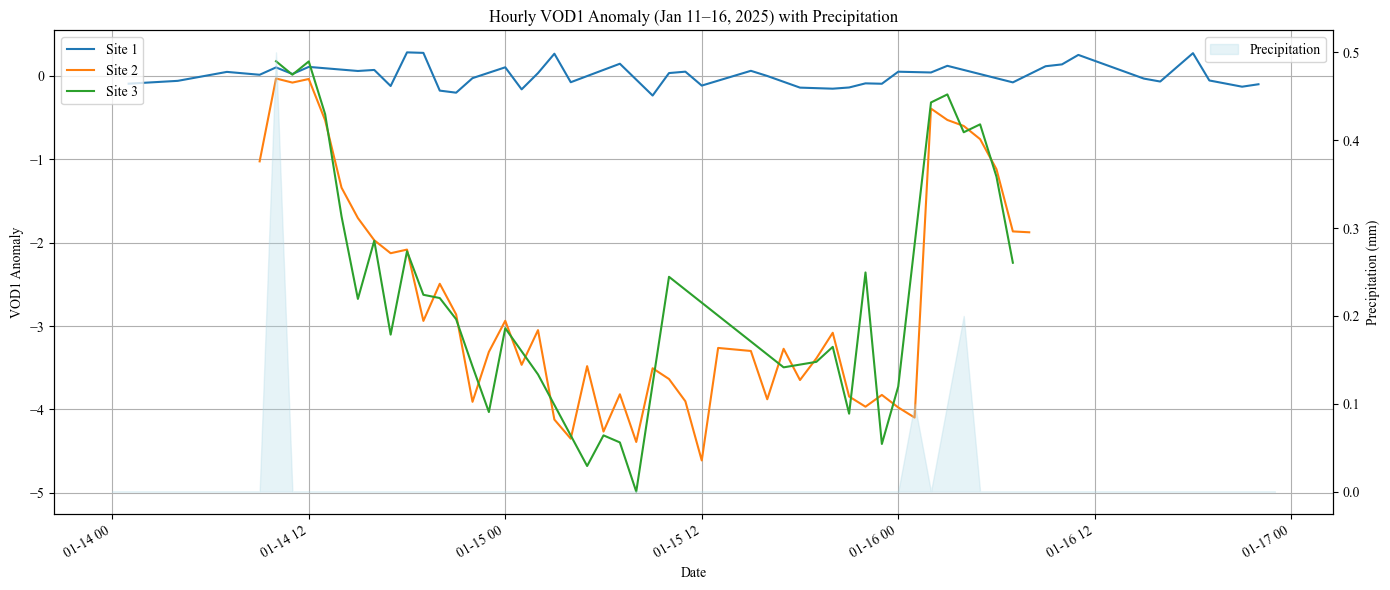

In [221]:

plt.rcParams["font.family"] = "Times New Roman"

# Helper function to build timestamp and filter
def prepare_vod(vod_df, site_label):
    vod = vod_df.copy()
    vod['Timestamp'] = pd.to_datetime({
        'year': 2025,
        'month': vod['month_'],
        'day': vod['day_'],
        'hour': vod['hour_']
    })
    vod.set_index('Timestamp', inplace=True)
    vod = vod.loc[start:end]
    vod['Site'] = site_label
    return vod

# Date range
start = pd.Timestamp("2025-01-14")
end = pd.Timestamp("2025-01-16 23:59:59")

# Prepare each site
vod1 = prepare_vod(vod_moreveg_hour_filter, "Site 1")
vod2 = prepare_vod(vod_moreveg_hour_filter12, "Site 2")
vod3 = prepare_vod(vod_moreveg_hour_filter17, "Site 3")

# Combine all
combined = pd.concat([vod1, vod2, vod3])

# Precipitation (resample hourly)
precip = precipitation_data.loc[start:end].copy()
precip_hourly = precip.resample('1h').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot each site
for label, df in combined.groupby('Site'):
    ax1.plot(df.index, df['VOD1_anom_mean'], label=label)

ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1 Anomaly")
ax1.set_title("Hourly VOD1 Anomaly (Jan 11–16, 2025) with Precipitation")
ax1.legend(loc='upper left')
ax1.grid(True)

# Precip overlay
ax2 = ax1.twinx()
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3, label='Precipitation')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


---
previous codes

In [4]:
#call in csvs- GNSS-VOD Data
vod17 = pd.read_csv('/Volumes/coraldelmar/march_collection/MACROCOSM-1.7/vod_anom17.csv')
vod17.head()

,Epoch,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,...,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
0,2023-10-06 00:00:00,C19,NaN,NaN,-46.0,7.7,5732,0.178573,0.151476,106,...,0.142980,36,-46.818905,0.470150,201,8.020398,0.633034,201,NaN,NaN
1,2023-10-06 00:00:00,C20,NaN,NaN,-86.5,37.8,2570,1.047158,0.664350,176,...,0.716403,108,-86.561993,0.578307,271,38.119188,0.624975,271,NaN,NaN
2,2023-10-06 00:00:00,C23,NaN,NaN,62.3,22.9,4034,1.014101,0.364073,146,...,NaN,0,61.976098,0.488861,205,21.851220,0.508806,205,NaN,NaN
3,2023-10-06 00:00:00,C27,NaN,NaN,169.5,34.3,2888,0.533966,0.892311,21,...,NaN,0,169.911688,0.431025,77,34.125974,0.575692,77,NaN,NaN
4,2023-10-06 00:00:00,C28,NaN,NaN,104.0,47.0,1808,2.209723,1.199658,198,...,0.738708,126,103.006161,0.675003,211,46.049289,0.566726,211,NaN,NaN


In [5]:
#date time and setting to local 
vod['Epoch'] = pd.to_datetime(vod['Epoch'])                
vod['Epoch'] = vod['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')  
vod = vod.set_index('Epoch')


vod12['Epoch'] = pd.to_datetime(vod12['Epoch'])
vod12['Epoch'] = vod12['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')
vod12 = vod12.set_index('Epoch')


vod17['Epoch'] = pd.to_datetime(vod17['Epoch'])
vod17['Epoch'] = vod17['Epoch'].dt.tz_localize('UTC').dt.tz_convert('Etc/GMT+5')
vod17 = vod17.set_index('Epoch')



In [ ]:
#more v less vegetation for each pairing

In [6]:

vod_moreveg = vod[
    (vod['Azimuth_mean'] >= 120) & (vod['Azimuth_mean'] <= 150) &
    (vod['Elevation_mean'] >= 20) & (vod['Elevation_mean'] <= 40)
]

vod_moreveg.head()
#
vod_lessveg = vod[
    ((vod['Azimuth_mean'] >= 30) & (vod['Azimuth_mean'] <= 40) &
     (vod['Elevation_mean'] >= 50) & (vod['Elevation_mean'] <= 60)) 
]

vod_lessveg.head()

,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,,
2025-01-13 19:33:30-05:00,E18,0.310717,NaN,30.1,57.5,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,-0.120939,NaN
2025-01-13 19:34:00-05:00,E18,0.738772,NaN,30.7,57.6,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.307116,NaN
2025-01-13 19:34:30-05:00,E18,0.136090,NaN,31.2,57.6,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,-0.295567,NaN
2025-01-13 19:35:00-05:00,E18,0.836904,NaN,31.8,57.7,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.405247,NaN
2025-01-13 19:35:30-05:00,E18,0.486572,NaN,32.4,57.7,948,0.431656,0.52903,628,0.40767,0.361535,107,31.053134,0.982898,702,57.859259,0.5537,702,0.054916,NaN


In [ ]:
# calculate the VOD anomaly for each observation by subtrac

In [7]:
#vod17
moreveg_mask = (
    (vod17['Elevation_mean'] > 20) &
    (
        ((vod17['Azimuth_mean'] >= 310) & (vod17['Azimuth_mean'] <= 315)) |
        ((vod17['Azimuth_mean'] >= 60) & (vod17['Azimuth_mean'] <= 110))
    )
)

#
vod_moreveg17 = vod17[moreveg_mask]
vod_lessveg17 = vod17[~moreveg_mask]  

# 
vod_moreveg17.head()
vod_lessveg17.head()

,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,,
2023-10-05 19:00:00-05:00,C19,NaN,NaN,-46.0,7.7,5732,0.178573,0.151476,106,0.234161,0.142980,36,-46.818905,0.470150,201,8.020398,0.633034,201,NaN,NaN
2023-10-05 19:00:00-05:00,C20,NaN,NaN,-86.5,37.8,2570,1.047158,0.664350,176,0.976673,0.716403,108,-86.561993,0.578307,271,38.119188,0.624975,271,NaN,NaN
2023-10-05 19:00:00-05:00,C27,NaN,NaN,169.5,34.3,2888,0.533966,0.892311,21,NaN,NaN,0,169.911688,0.431025,77,34.125974,0.575692,77,NaN,NaN
2023-10-05 19:00:00-05:00,C32,NaN,NaN,-158.5,34.8,2905,0.072776,0.760902,108,-0.290966,0.579615,41,-158.222581,0.515307,186,34.048387,0.552168,186,NaN,NaN
2023-10-05 19:00:00-05:00,C37,NaN,NaN,1.8,44.8,1922,1.865280,1.153177,1165,2.246100,0.722207,728,1.082535,0.630126,1420,43.903873,0.543816,1420,NaN,NaN


In [8]:
# More vegetation: elevation ≤ 60
vod_moreveg12 = vod12[vod12['Elevation_mean'] <= 60]

# Less vegetation: elevation > 60
vod_lessveg12 = vod12[vod12['Elevation_mean'] > 60]

# 
vod_moreveg12.head()
vod_lessveg12.head()

,SV,VOD1,VOD2,Azimuth,Elevation,CellID,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count,Azimuth_mean,Azimuth_std,Azimuth_count,Elevation_mean,Elevation_std,Elevation_count,VOD1_anom,VOD2_anom
Epoch,,,,,,,,,,,,,,,,,,,,
2023-10-05 19:00:00-05:00,E03,2.394685,NaN,-135.7,76.4,203,0.755169,1.054117,96,0.978923,1.114565,45,-134.250000,1.893106,136,76.060294,0.586677,136,1.639516,NaN
2023-10-05 19:00:00-05:00,G27,2.406463,1.435047,156.1,73.5,251,1.235198,1.291018,290,1.189488,0.710570,238,156.097989,1.359446,348,73.913793,0.514498,348,1.171264,0.245559
2023-10-05 19:00:30-05:00,E03,1.520561,NaN,-136.3,76.2,203,0.755169,1.054117,96,0.978923,1.114565,45,-134.250000,1.893106,136,76.060294,0.586677,136,0.765393,NaN
2023-10-05 19:00:30-05:00,G27,2.940840,2.034265,155.6,73.8,251,1.235198,1.291018,290,1.189488,0.710570,238,156.097989,1.359446,348,73.913793,0.514498,348,1.705642,0.844777
2023-10-05 19:01:00-05:00,E03,1.452852,NaN,-136.9,76.1,203,0.755169,1.054117,96,0.978923,1.114565,45,-134.250000,1.893106,136,76.060294,0.586677,136,0.697684,NaN


In [13]:
#overlaying more and less vegetation with precipitation

plt.rcParams["font.family"] = "Times New Roman"

precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M',  
    dayfirst=True            
)
precipitation_data.set_index('Timestamp', inplace=True)

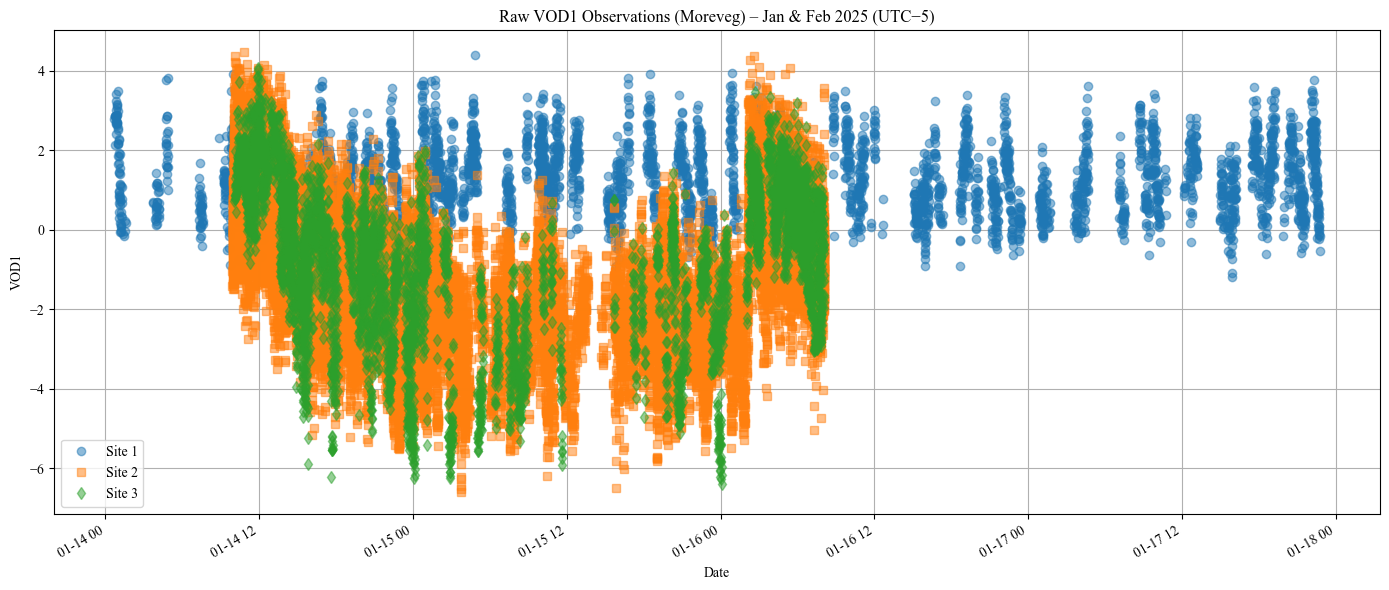

In [13]:
# Remove timezone awareness correctly — on each DataFrame
vod_moreveg.index    = vod_moreveg.index.tz_localize(None)
vod_moreveg12.index  = vod_moreveg12.index.tz_localize(None)
vod_moreveg17.index  = vod_moreveg17.index.tz_localize(None)
precipitation_data.index = precipitation_data.index.tz_localize(None)

# 
start = pd.Timestamp("2025-01-14")
end   = pd.Timestamp("2025-01-17 23:59:59")
#filter each dataset by time range
vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]
vod12_filtered = vod_moreveg12.loc[(vod_moreveg12.index >= start) & (vod_moreveg12.index <= end)]
vod17_filtered = vod_moreveg17.loc[(vod_moreveg17.index >= start) & (vod_moreveg17.index <= end)]

# 
fig, ax = plt.subplots(figsize=(14, 6))

# 
ax.plot(vod_filtered.index, vod_filtered['VOD1'], label='Site 1', marker='o', linestyle='', alpha=0.5)
ax.plot(vod12_filtered.index, vod12_filtered['VOD1'], label='Site 2', marker='s', linestyle='', alpha=0.5)
ax.plot(vod17_filtered.index, vod17_filtered['VOD1'], label='Site 3', marker='d', linestyle='', alpha=0.5)

# 
ax.set_title("Raw VOD1 Observations (Moreveg) – Jan & Feb 2025 (UTC−5)")
ax.set_xlabel("Date")
ax.set_ylabel("VOD1")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()  
plt.tight_layout()
plt.show()


In [19]:
vod_moreveg.index = vod_moreveg.index.tz_localize(None)
precipitation_data.index = precipitation_data.index.tz_localize(None)


In [ ]:
start = pd.Timestamp("2025-02-03")
end   = pd.Timestamp("2025-02-09")

vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]


# 
vod_plot = vod_filtered.copy()
vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

#
mean_vod = vod_plot.groupby('hour')['VOD1'].sum().reset_index()

#
precip = precipitation_data.copy()
precip = precip.loc[start:end]
precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(mean_vod['hour'], mean_vod['VOD1'], label='Site 1', marker='o', color='green')
ax1.set_ylabel("Mean VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title(" Diurnal VOD1 (Site 1) with Precipitation")
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

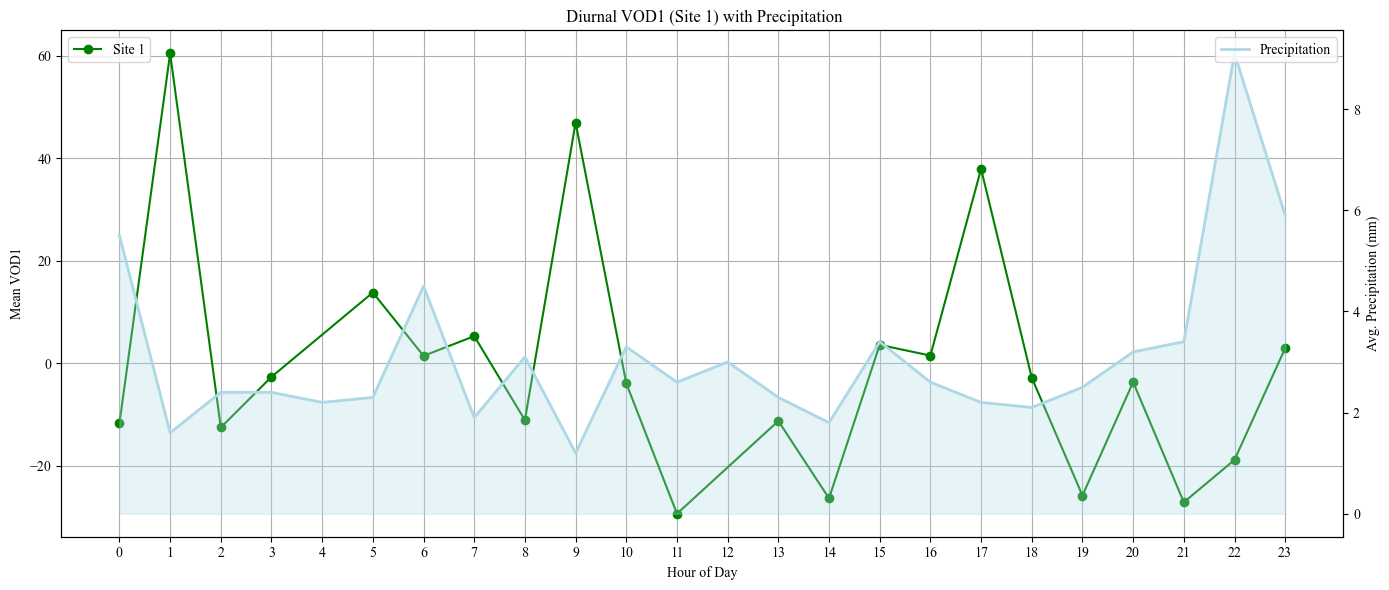

In [53]:
start = pd.Timestamp("2025-02-03")
end   = pd.Timestamp("2025-02-09")

vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]


# 
vod_plot = vod_filtered.copy()
vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

#
mean_vod = vod_plot.groupby('hour')['VOD1_anom'].sum().reset_index()

#
precip = precipitation_data.copy()
precip = precip.loc[start:end]
precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').sum(numeric_only=True)
precip_col = precip_hourly.columns[0]

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(mean_vod['hour'], mean_vod['VOD1_anom'], label='Site 1', marker='o', color='green')
ax1.set_ylabel("Mean VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title(" Diurnal VOD1 (Site 1) with Precipitation")
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


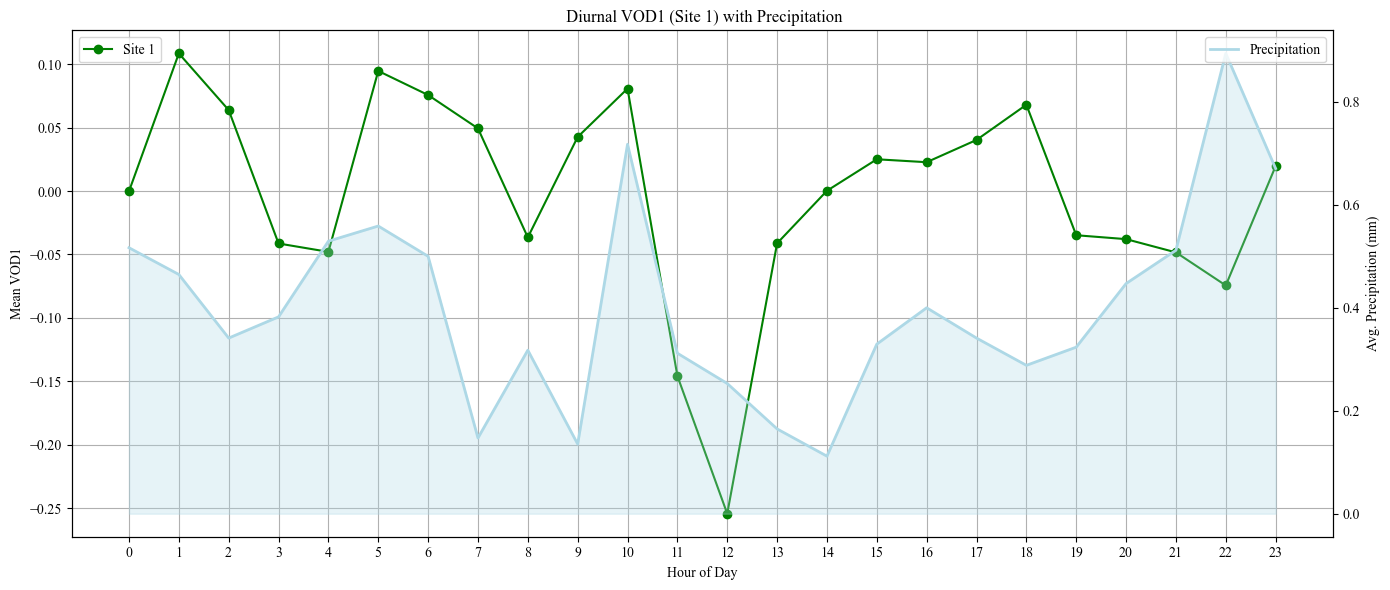

In [56]:
start = pd.Timestamp("2025-01-23")
end   = pd.Timestamp("2025-02-09")

vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]


# 
vod_plot = vod_filtered.copy()
vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

#
mean_vod = vod_plot.groupby('hour')['VOD1_anom'].mean().reset_index()

#
precip = precipitation_data.copy()
precip = precip.loc[start:end]
precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').mean(numeric_only=True)
precip_col = precip_hourly.columns[0]

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(mean_vod['hour'], mean_vod['VOD1_anom'], label='Site 1', marker='o', color='green')
ax1.set_ylabel("Mean VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title(" Diurnal VOD1 (Site 1) with Precipitation")
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


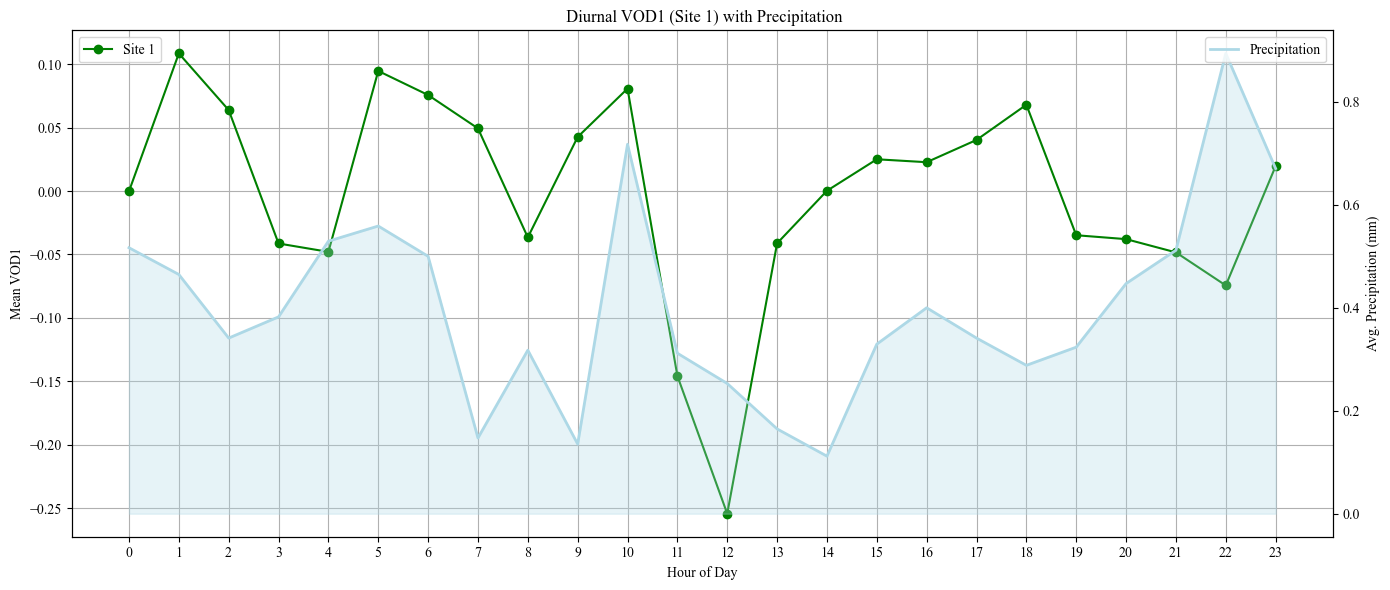

In [69]:
start = pd.Timestamp("2025-01-23")
end   = pd.Timestamp("2025-02-09")

vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]


# 
vod_plot = vod_filtered.copy()
vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

#
mean_vod = vod_plot.groupby('hour')['VOD1_anom'].mean().reset_index()

#

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(mean_vod['hour'], mean_vod['VOD1_anom'], label='Site 1', marker='o', color='green')
ax1.set_ylabel("Mean VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title(" Diurnal VOD1 (Site 1) with Precipitation")
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [21]:
vod_moreveg.index    = vod_moreveg.index.tz_localize(None)
vod_moreveg12.index  = vod_moreveg12.index.tz_localize(None)
vod_moreveg17.index  = vod_moreveg17.index.tz_localize(None)
precipitation_data.index = precipitation_data.index.tz_localize(None)

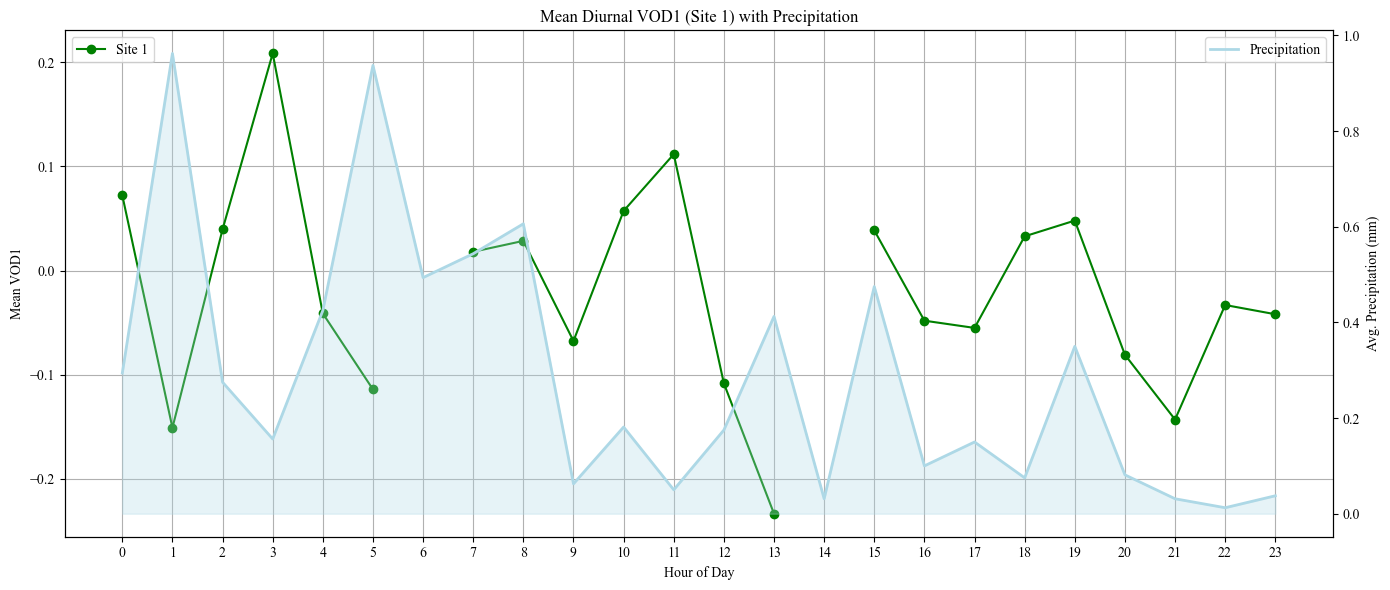

In [49]:
start = pd.Timestamp("2025-01-01")
end   = pd.Timestamp("2025-01-17")

# 
vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]
vod_plot = vod_filtered.copy()
vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

#
mean_vod = vod_plot.groupby('hour')['VOD1_anom'].mean().reset_index()

#
precip = precipitation_data.copy()
precip = precip.loc[start:end]
precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').mean(numeric_only=True)
precip_col = precip_hourly.columns[0]

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(mean_vod['hour'], mean_vod['VOD1_anom'], label='Site 1', marker='o', color='green')
ax1.set_ylabel("Mean VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title("Mean Diurnal VOD1 (Site 1) with Precipitation")
ax1.grid(True)
ax1.legend(loc='upper left')

#
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


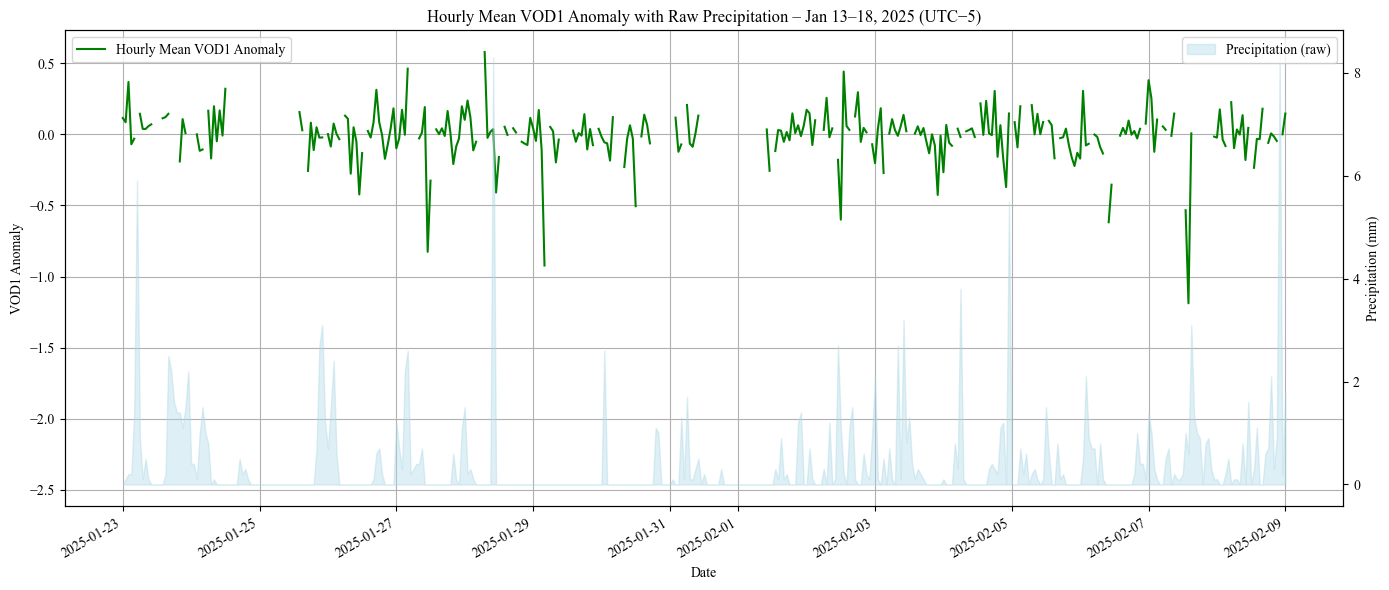

In [79]:

plt.rcParams["font.family"] = "Times New Roman"

#
start = pd.Timestamp("2025-01-23")
end   = pd.Timestamp("2025-02-09")


# 
vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]

# 
vod_hourly = vod_filtered.resample('1h').mean(numeric_only=True)

# 
precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M', 
    dayfirst=True
)
precipitation_data.set_index('Timestamp', inplace=True)
precip_filtered = precipitation_data.loc[start:end]
precip_col = precip_filtered.select_dtypes(include='number').columns[0]  
# 
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(vod_hourly.index, vod_hourly['VOD1_anom'], label='Hourly Mean VOD1 Anomaly', color='green', linewidth=1.5)
ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1 Anomaly")
ax1.legend(loc='upper left')
ax1.grid(True)

# 
ax2 = ax1.twinx()
ax2.fill_between(precip_filtered.index, precip_filtered[precip_col],
                 color='lightblue', alpha=0.4, label='Precipitation (raw)')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

ax1.set_title("Hourly Mean VOD1 Anomaly with Raw Precipitation – Jan 13–18, 2025 (UTC−5)")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [25]:
vod_moreveg.index    = vod_moreveg.index.tz_localize(None)
vod_moreveg12.index  = vod_moreveg12.index.tz_localize(None)
vod_moreveg17.index  = vod_moreveg17.index.tz_localize(None)
precipitation_data.index = precipitation_data.index.tz_localize(None)

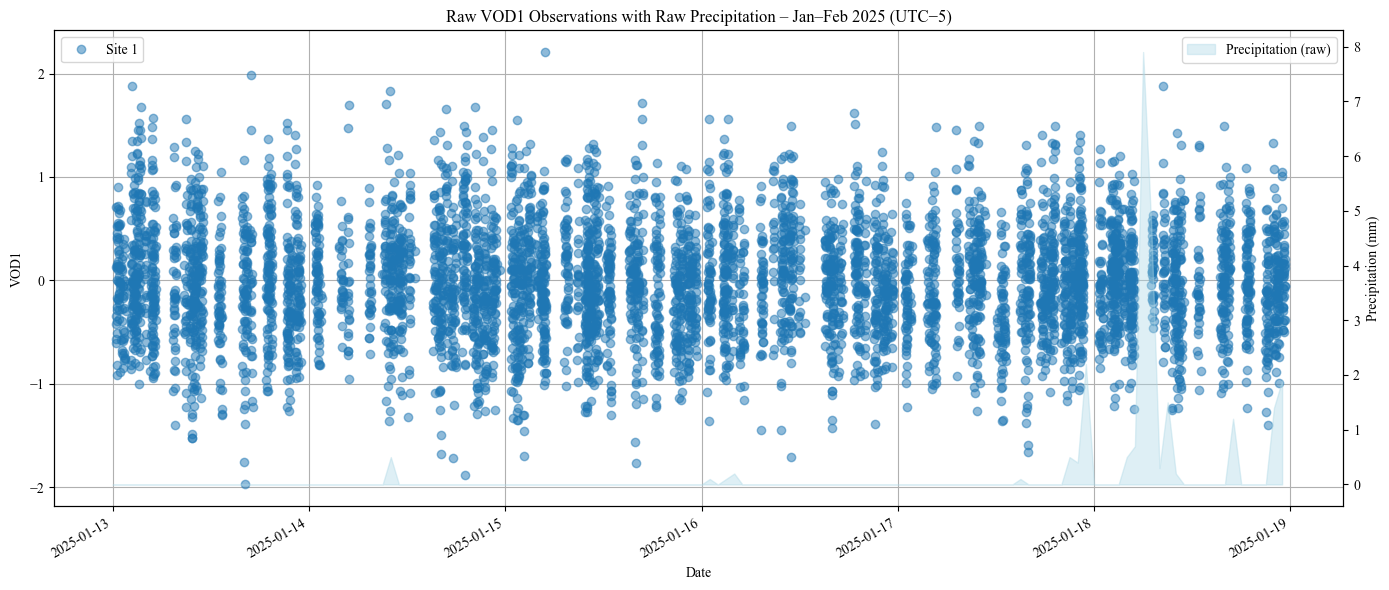

In [65]:
#
plt.rcParams["font.family"] = "Times New Roman"
start = pd.Timestamp("2025-01-13")
end   = pd.Timestamp("2025-01-18 23:59:59")

# 
vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vfod_moreveg.index <= end)]
#vod_filtered = vod_plot.groupby('hour')['VOD1_anom'].mean()

#vod12_filtered = vod_moreveg12.loc[(vod_moreveg12.index >= start) & (vod_moreveg12.index <= end)]
#vod17_filtered = vod_moreveg17.loc[(vod_moreveg17.index >= start) & (vod_moreveg17.index <= end)]

# 
precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M', 
    dayfirst=True
)

# 
precipitation_data.set_index('Timestamp', inplace=True)
#precipitation_data.index = precipitation_data.index.tz_localize('UTC').tz_convert('Etc/GMT+5')

# 
precip_filtered = precipitation_data.loc[start:end]
precip_col = precip_filtered.select_dtypes(include='number').columns[0]  # auto-detect precip column

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(vod_filtered.index, vod_filtered['VOD1_anom'], label='Site 1', marker='o', linestyle='', alpha=0.5)
#ax1.plot(vod12_filtered.index, vod12_filtered['VOD1'], label='Site 2', marker='s', linestyle='', alpha=0.5)
#ax1.plot(vod17_filtered.index, vod17_filtered['VOD1'], label='Site 3', marker='d', linestyle='', alpha=0.5)

ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1")
ax1.legend(loc='upper left')
ax1.grid(True)

# Overlay raw precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.fill_between(precip_filtered.index, precip_filtered[precip_col],
                 color='lightblue', alpha=0.4, label='Precipitation (raw)')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

# Final formatting
ax1.set_title("Raw VOD1 Observations with Raw Precipitation – Jan–Feb 2025 (UTC−5)")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_6065/1707981184.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly = vod_filtered.resample('1H').mean(numeric_only=True)


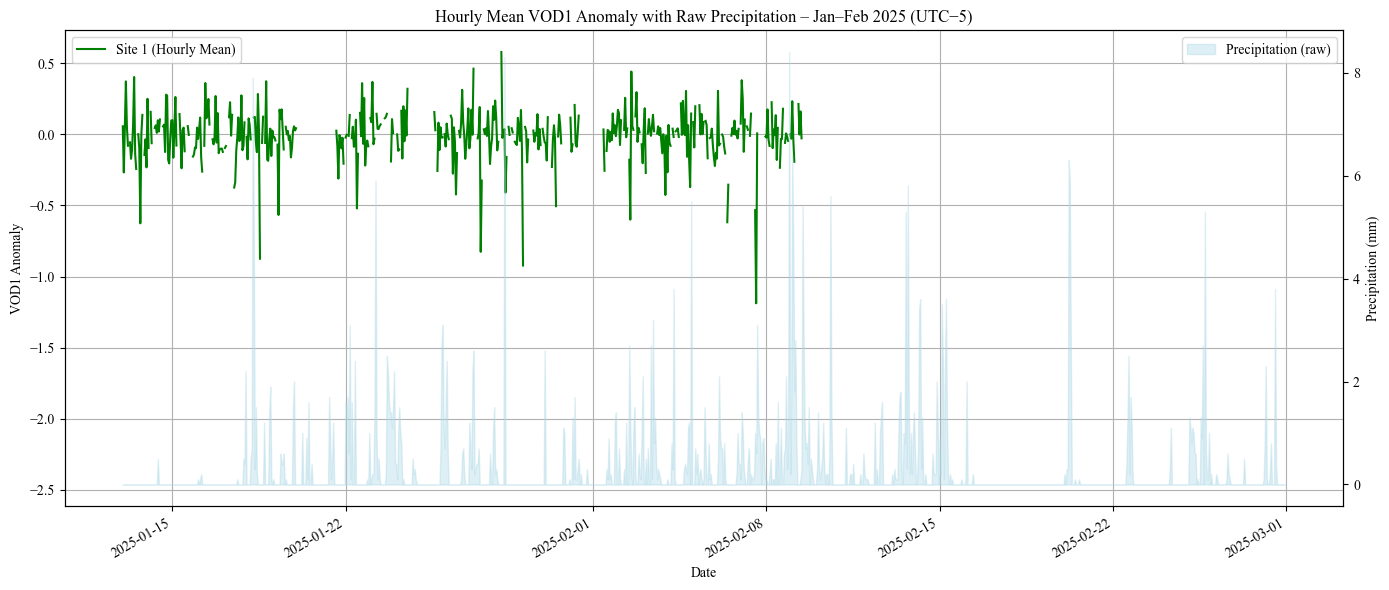

In [60]:

# Font settings
plt.rcParams["font.family"] = "Times New Roman"

# time intervals
start = pd.Timestamp("2025-01-13")
end   = pd.Timestamp("2025-02-28 23:59:59")

# Filter VOD1 data (moreveg only)
vod_filtered = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]

# Resample VOD1 anomalies to hourly mean
vod_hourly = vod_filtered.resample('1h').mean(numeric_only=True)

# precip data
precipitation_data = pd.read_excel('/Volumes/coraldelmar/weather.station_alonso/2025/precip.xlsx')
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'],
    format='%d/%m/%Y %H:%M',
    dayfirst=True
)
precipitation_data.set_index('Timestamp', inplace=True)
precip_filtered = precipitation_data.loc[start:end]
precip_col = precip_filtered.select_dtypes(include='number').columns[0]

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
ax1.plot(vod_hourly.index, vod_hourly['VOD1_anom'], label='Site 1 (Hourly Mean)', color='green')
ax1.set_xlabel("Date")
ax1.set_ylabel("VOD1 Anomaly")
ax1.legend(loc='upper left')
ax1.grid(True)

# 
ax2 = ax1.twinx()
ax2.fill_between(precip_filtered.index, precip_filtered[precip_col],
                 color='lightblue', alpha=0.4, label='Precipitation (raw)')
ax2.set_ylabel("Precipitation (mm)")
ax2.legend(loc='upper right')

# 
ax1.set_title("Hourly Mean VOD1 Anomaly with Raw Precipitation – Jan–Feb 2025 (UTC−5)")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


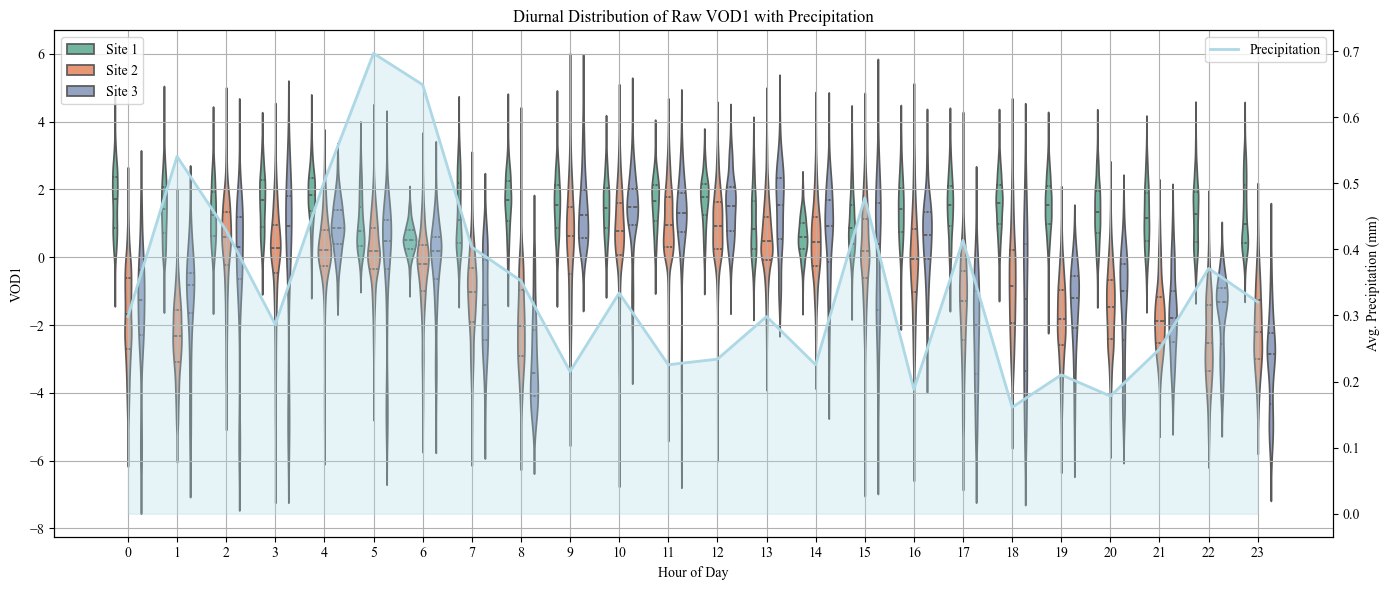

In [29]:

vod_plot = vod_filtered.copy()
vod12_plot = vod12_filtered.copy()
vod17_plot = vod17_filtered.copy()

vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

vod12_plot['hour'] = vod12_plot.index.hour
vod12_plot['Site'] = 'Site 2'

vod17_plot['hour'] = vod17_plot.index.hour
vod17_plot['Site'] = 'Site 3'

combined = pd.concat([vod_plot, vod12_plot, vod17_plot], ignore_index=True)

##
precip = precipitation_data.copy()
precip = precip.loc[start:end]

precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').mean(numeric_only=True)  # 

precip_col = precip_hourly.columns[0]  
fig, ax1 = plt.subplots(figsize=(14, 6))

# Violin plot
sns.violinplot(data=combined, x='hour', y='VOD1', hue='Site',
               inner='quartile', ax=ax1, palette='Set2')

ax1.set_ylabel("VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title("Diurnal Distribution of Raw VOD1 with Precipitation")
ax1.legend(loc='upper left')
ax1.grid(True)

# 
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
#calculate the anomaly per cell per time & the vod anom should be neg
#avg anomaly, and add avg vod 

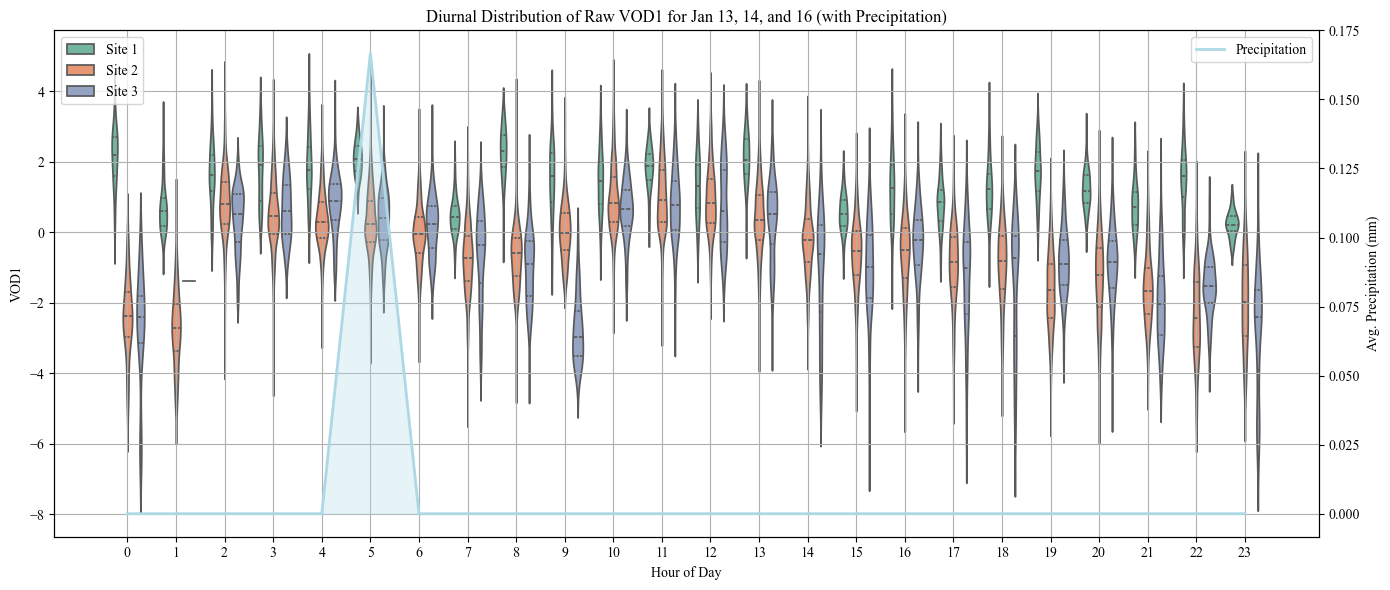

In [30]:
#
selected_days = ['2025-01-13', '2025-01-14', '2025-01-16']
selected_days = [pd.Timestamp(d, tz="Etc/GMT+5") for d in selected_days]

def filter_days(df, days):
    return df[df.index.normalize().isin(days)]
#
vod_plot = filter_days(vod_filtered.copy(), selected_days)
vod12_plot = filter_days(vod12_filtered.copy(), selected_days)
vod17_plot = filter_days(vod17_filtered.copy(), selected_days)

vod_plot['hour'] = vod_plot.index.hour
vod_plot['Site'] = 'Site 1'

vod12_plot['hour'] = vod12_plot.index.hour
vod12_plot['Site'] = 'Site 2'

vod17_plot['hour'] = vod17_plot.index.hour
vod17_plot['Site'] = 'Site 3'

combined = pd.concat([vod_plot, vod12_plot, vod17_plot], ignore_index=True)

# 
precip = precipitation_data.copy()
precip = precip[precip.index.normalize().isin(selected_days)]

precip['hour'] = precip.index.hour
precip_hourly = precip.groupby('hour').mean(numeric_only=True)
precip_col = precip_hourly.columns[0]  # auto-detect column name

# 
fig, ax1 = plt.subplots(figsize=(14, 6))

# 
sns.violinplot(data=combined, x='hour', y='VOD1', hue='Site',
               inner='quartile', ax=ax1, palette='Set2')

ax1.set_ylabel("VOD1")
ax1.set_xlabel("Hour of Day")
ax1.set_xticks(range(24))
ax1.set_title("Diurnal Distribution of Raw VOD1 for Jan 13, 14, and 16 (with Precipitation)")
ax1.legend(loc='upper left')
ax1.grid(True)

# Precip overlay on secondary axis
ax2 = ax1.twinx()
ax2.plot(precip_hourly.index, precip_hourly[precip_col],
         color='lightblue', linewidth=2, label='Precipitation')
ax2.fill_between(precip_hourly.index, precip_hourly[precip_col],
                 color='lightblue', alpha=0.3)
ax2.set_ylabel("Avg. Precipitation (mm)")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


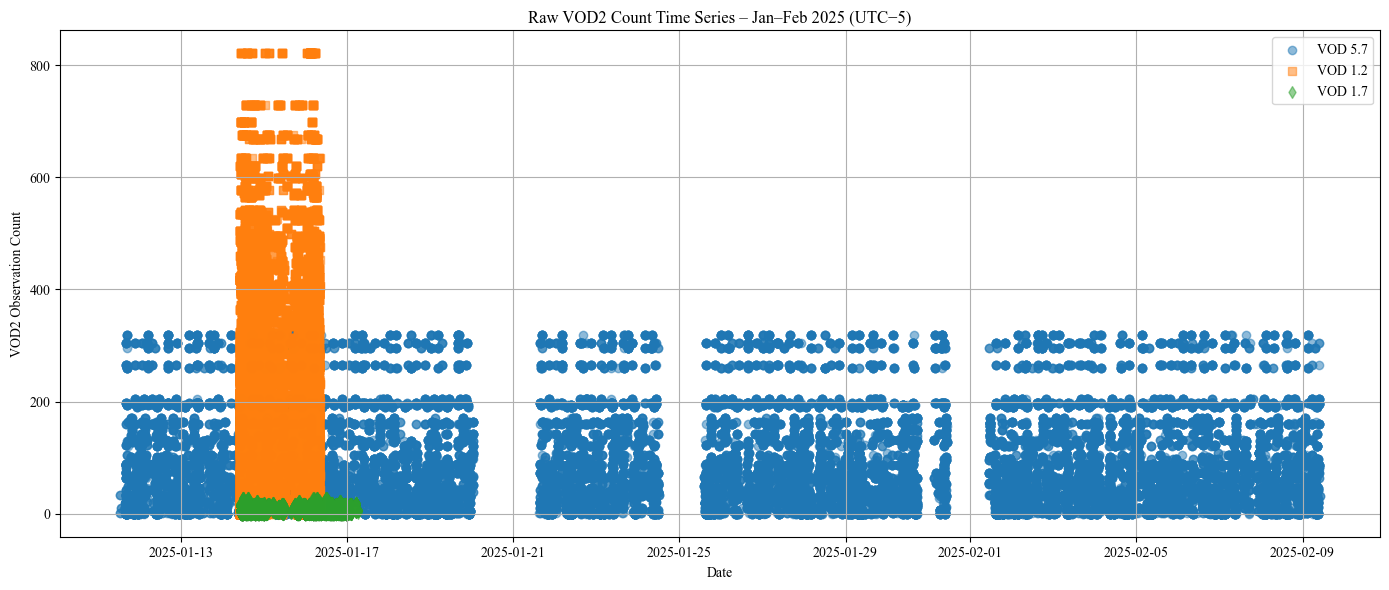

In [32]:
#
start = pd.Timestamp("2025-01-01", tz="Etc/GMT+5")
end   = pd.Timestamp("2025-02-28 23:59:59", tz="Etc/GMT+5")

vod_count_57 = vod_moreveg.loc[(vod_moreveg.index >= start) & (vod_moreveg.index <= end)]
vod_count_12 = vod_moreveg12.loc[(vod_moreveg12.index >= start) & (vod_moreveg12.index <= end)]
vod_count_17 = vod_moreveg17.loc[(vod_moreveg17.index >= start) & (vod_moreveg17.index <= end)]

# 
plt.figure(figsize=(14, 6))

plt.scatter(vod_count_57.index, vod_count_57['VOD2_count'], label='VOD 5.7', alpha=0.5, marker='o')
plt.scatter(vod_count_12.index, vod_count_12['VOD2_count'], label='VOD 1.2', alpha=0.5, marker='s')
plt.scatter(vod_count_17.index, vod_count_17['VOD2_count'], label='VOD 1.7', alpha=0.5, marker='d')

plt.xlabel("Date")
plt.ylabel("VOD2 Observation Count")
plt.title("Raw VOD2 Count Time Series – Jan–Feb 2025 (UTC−5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


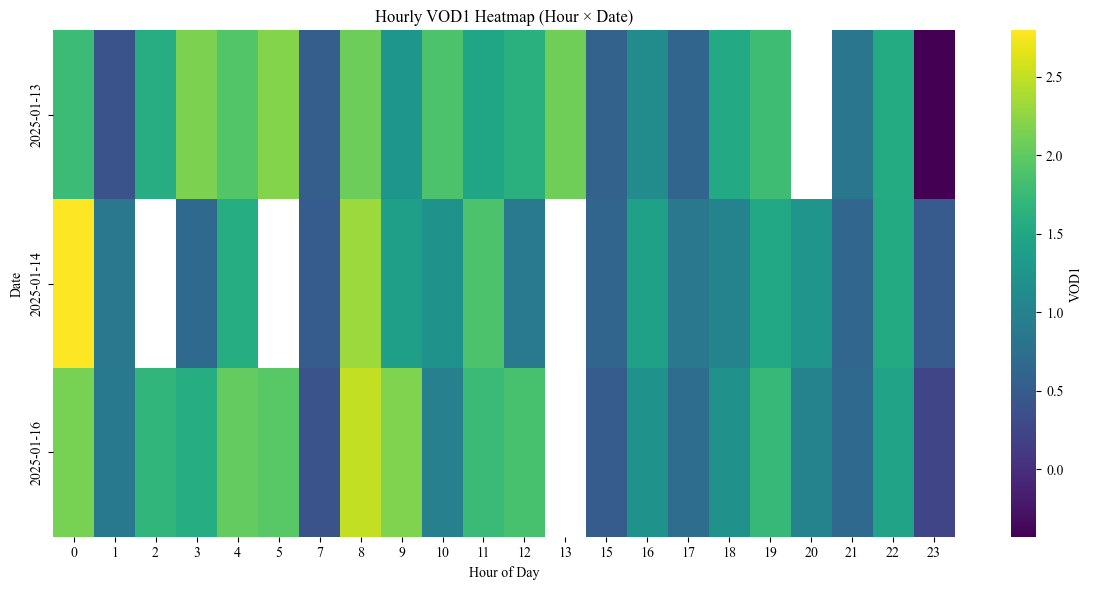

In [33]:
# 
vod_plot['date'] = vod_plot.index.date
vod_plot['hour'] = vod_plot.index.hour
heatmap_data = vod_plot.pivot_table(index='date', columns='hour', values='VOD1', aggfunc='mean')

#  heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'VOD1'})
plt.title("Hourly VOD1 Heatmap (Hour × Date)")
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.tight_layout()
plt.show()


In [37]:
print("patches index type:", type(patches.index))
print("vod12 index type:", type(vod12.index))
print("patches index sample:", patches.index[:5])
print("vod12 index sample:", vod12.index[:5])


patches index type: <class 'pandas.core.indexes.range.RangeIndex'>
vod12 index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
patches index sample: RangeIndex(start=0, stop=5, step=1, name='CellID')
vod12 index sample: DatetimeIndex(['2023-10-05 19:00:00-05:00', '2023-10-05 19:00:30-05:00',
               '2023-10-05 19:01:00-05:00', '2023-10-05 19:01:30-05:00',
               '2023-10-05 19:02:00-05:00'],
              dtype='datetime64[ns, Etc/GMT+5]', name='Epoch', freq=None)
